In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

Graph with 6 nodes and 7 edges


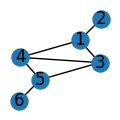

In [2]:
figsize=(1, 1)
fig = plt.figure(figsize=figsize)
G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 6)])

print(nx.info(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

# Definitions

## Definition 1 - Partition of A

A set $A = A_1,..,A_k$ of disjoint subsets of a set $A$ is a parition of $A$ if $\cup A$ of all sets $A_i$ and $A \neq\emptyset$ for every i.

In [3]:
A = {1, 2, 3, 4, 5, 6} 

A_1 = {1, 2}
A_2 = {3, 4}
A_3 = {5, 6}

A == A_1 | A_2 | A_3

True

## Definition 2 - Vertex set

The set of vertices in a graph denoted by $V(G)$.

Vertex set V(G) = {1, 2, 3, 4, 5, 6}


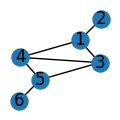

In [4]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Vertex set V(G) = {set(G.nodes)}')

## Definition 3 - Edge set

The set of edges in a graph denoted by $E(G)$.

Edge set E(G) = {(1, 2), (1, 3), (4, 5), (5, 6), (1, 4), (3, 4), (3, 5)}


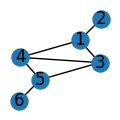

In [5]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Edge set E(G) = {set(G.edges)}')

## Definition 4 - Order

The number of vertices in a graph denoted by $|V|$.

Order |V| = 6


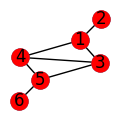

In [6]:
order = G.order()
assert order == len(G.nodes)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=G.nodes, node_size=150, node_color='red')

print(f'Order |V| = {order}')

## Definition 5 - Size

The number of edges in a graph denoted by $|E|$.

Size |E| = 7


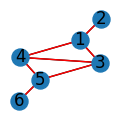

In [7]:
size = G.size()
assert size == len(G.edges)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, edge_color='red')

print(f'Size |E| = {size}')

## Definition 5 - Incident

A vertex $v$ is incident with an edge $e$ if $v \in e$ then $e$ is an edge at $v$. 

Incident edges for v_1  = [(1, 2), (1, 3), (1, 4)]


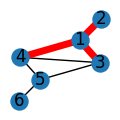

In [8]:
node = 1
incident_edges = G.edges(node)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=incident_edges, edge_color='red', width=5)

print(f'Incident edges for v_{node}  = {incident_edges}')

### Incidence matrix

The incidence matrix is a matrix in which each row of the matrix corresponds to a vertex in the graph, and each column corresponds to an edge. The entry in row i and column j is 1 if vertex i is incident to edge j, and 0 otherwise. In directed graphs, the entries can be either 1, -1 or 0, depending on the direction of the edge.

In [9]:
incidence_matrix = nx.incidence_matrix(G)

assert incidence_matrix.shape[0] == G.order()
assert incidence_matrix.shape[1] == G.size()

print(f'Incident matrix:\n{incidence_matrix.todense()}')

Incident matrix:
[[1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


## Definition 6 - Adjacent

Two vertices $x$,$y$ of $G$ are adjacent if $xy$ is is an edge of $G$.

Adjacent edges for v_1  = [(1, 2), (1, 3), (1, 4)]


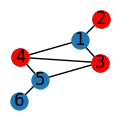

In [10]:
node = 1
adjacent_nodes = list(G.adj[node].keys())

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=adjacent_nodes, node_size=150, node_color='red')

# Check if vertices 1, 3 are adjacent.
assert G.has_edge(1, 3)
# Check if vertices 1, 6 are not adjacent.
assert G.has_edge(1, 6) == False

print(f'Adjacent edges for v_{node}  = {incident_edges}')

### Adjacency matrix

An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In [11]:
print(f'Adjency matrix:\n{nx.adjacency_matrix(G).todense()}')

Adjency matrix:
[[0 1 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 1 1 0]
 [1 0 1 0 1 0]
 [0 0 1 1 0 1]
 [0 0 0 0 1 0]]


## Definition 7 - Complete

If all vertices of G are pairwise adjacent thet $G$ is complete.

Adjency matrix:
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


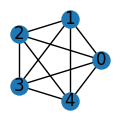

In [12]:
# Generate complete graph K
order = 5
K = nx.complete_graph(order)

fig = plt.figure(figsize=figsize)
nx.draw(K, pos=nx.kamada_kawai_layout(K), node_size=150, with_labels=True)

print(f'Adjency matrix:\n{nx.adjacency_matrix(K).todense()}')

### Examples of completed graphs

*Note: The graph $K_2$ is sometimes denoted by $Q_1$ (1-cube).* 

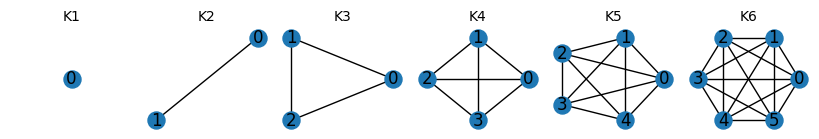

In [13]:
fig, axis = plt.subplots(nrows=1, ncols=6, figsize=(8, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)

for i, order in enumerate(range(1, 7)):
    axis[i].set_title((f'K{order}'), fontdict={'fontsize': 10})

    K = nx.complete_graph(order)
    ax = nx.draw(K, pos=nx.kamada_kawai_layout(K), node_size=150, with_labels=True, ax=axis[i])

## Defintion 8 - Independent

A set of vertices or edges is independent if no two of its elements are adjacent. 

### Node independent

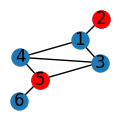

In [14]:
assert G.has_edge(2, 5) == False

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=[2, 5], node_size=150, node_color='red');

### Edge independent

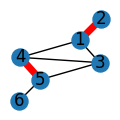

In [15]:
assert (4, 5) not in G.edges(1)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=[(4, 5), (1, 2)], edge_color='red', width=5);

## Definition 9 - Isomorphic 

We call $G$ and $H$ isomorphic and write $G \simeq H$ if there exists a bijections $\phi: V \to V^{\prime}$ with $xy \in E \Longleftrightarrow \phi(x)\phi(y) \in E^{\prime}$ for all $x,y$ in $V$. 

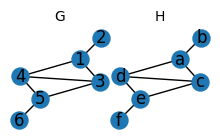

In [16]:
relabel_nodes = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}

H = nx.relabel_nodes(G, mapping=relabel_nodes)

assert nx.is_isomorphic(G, H) == True


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G'), fontdict={'fontsize': 10})
axis[1].set_title((f'H'), fontdict={'fontsize': 10})
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0])
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True, ax=axis[1])

## Definition 10 - Property

A graph property $Π$ is a class of graphs that is closed under graph isomorphisms. That is, if two graphs $G1$ and $G2$ are isomorphic, both belong to $Π$ or both don’t. 

Examples: connected graphs, trees, planar graphs, regular graphs

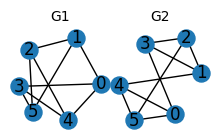

In [17]:
G1 = nx.random_regular_graph(3, 6, seed=42)
G2 = nx.random_regular_graph(3, 6, seed=24)

assert nx.is_isomorphic(G1, G2) == True
assert nx.is_regular(G1) == nx.is_regular(G2)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G1'), fontdict={'fontsize': 10})
axis[1].set_title((f'G2'), fontdict={'fontsize': 10})
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_size=150, with_labels=True, ax=axis[0])
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_size=150, with_labels=True, ax=axis[1])

## Definition 11 - Invariant

A map taking graph as arguments is called a graph invariant if it assign equal values to isomorphic graphs.

A graph invariant is a property or a quantity associated with a graph that remains unchanged even if the graph undergoes certain transformations, such as relabeling of nodes or edges, or graph isomorphisms. 

In [18]:
G1 = nx.random_regular_graph(3, 6, seed=42)
G2 = nx.random_regular_graph(3, 6, seed=24)

assert nx.diameter(G1) == nx.diameter(G2) 
assert G1.number_of_edges() == G2.number_of_edges()
assert G1.number_of_nodes() == G2.number_of_nodes()

G_degree_sequence = [d for n, d in G1.degree()]
H_degree_sequence = [d for n, d in G2.degree()]

assert G_degree_sequence == H_degree_sequence 

## Defintion 12 - Induced

If $G\subseteq G^{\prime}$ and $G^{\prime}$ contains all the edges $xy \subseteq E$ with $x, y \subseteq V^{\prime}$ then $G^{\prime}$ is an inducted subgraph og $G$. We stay that $V^{\prime}$ induces $G^{\prime}$ in $G$.

E(H) = {(1, 3), (4, 5), (1, 4), (3, 4), (3, 5)}
E(G) = {(1, 2), (1, 3), (4, 5), (5, 6), (1, 4), (3, 4), (3, 5)}


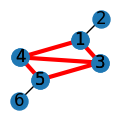

In [19]:
H = nx.induced_subgraph(G, [1, 3, 4, 5])

assert set(H.edges).issubset(G.edges)
assert set(H.nodes).issubset(G.nodes)
print(f'E(H) = {set(H.edges)}')
print(f'E(G) = {set(G.edges)}')

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=pos, node_size=150, with_labels=True)

nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Definition 13 - Spanning

$G^{\prime}$ is a spanning subgraph of G if $V^{\prime}$ spans all of $G$ or $V^{\prime} = V$. 

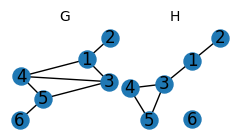

In [20]:
random_edges = np.random.choice(len(list(G.edges))-1, size=5, replace=False).tolist()
random_edges = [list(G.edges)[i] for i in random_edges]

H = nx.Graph()
H.add_nodes_from(G.nodes)
H.add_edges_from(random_edges)

assert G.nodes == H.nodes 

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G'), fontdict={'fontsize': 10})
axis[1].set_title((f'H'), fontdict={'fontsize': 10})
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=150, with_labels=True, ax=axis[0])
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True, ax=axis[1])

## Definition 14 - Line Graph

The line graph $L(G)$ of $G$ is the graph of $E$ in which $x,y \in E$ are adjacent as vertices if and only if they are adjacent as edges in $G$. 

V(L) = {(1, 2), (1, 3), (5, 6), (4, 5), (1, 4), (3, 4), (3, 5)}


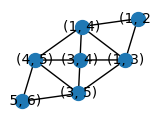

In [21]:
L = nx.line_graph(G)

print(f'V(L) = {set(L.nodes)}')

fig = plt.figure(figsize=(1.4, 1))
nx.draw(L, pos=nx.kamada_kawai_layout(L), node_size=100, with_labels=True,font_size=10)

## Definition 15 - Neighbors $N_{G}(v_i)$

The set of neighbors of a vertex v.

Neighbors for vertex 1 = {2, 3, 4}


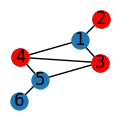

In [22]:
vertex = 1
neighbors = set(nx.neighbors(G, vertex))
print(f'Neighbors for vertex {vertex} = {neighbors}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=neighbors, node_size=150, node_color='red');

## Definition 16 - Degree

The degree $d(V)$ of vertex $v$ is the number $|E(v)|$ of edges at v or number of neighbors of $v$.

In [23]:
vertex = 1
assert nx.degree(G, vertex) == len(set(nx.neighbors(G, vertex)))

## Definition 17 - Isolated

A vertex of degree $0$ is isolated.

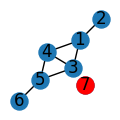

In [24]:
H = G.copy()
H.add_node(7)  # Vertex 7 is isolated.

assert nx.degree(H, 7) == 0

fig = plt.figure(figsize=figsize)
new_pos = pos=nx.kamada_kawai_layout(H)
nx.draw(H, pos=new_pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(new_pos, pos=pos, nodelist=[7], node_size=150, node_color='red');

## Definition 18 - Minimum degree

Minimum degree $\delta(G)$ is the minimum degree of G.

In [25]:
degrees = [G.degree(n) for n in G.nodes()]
min_degree = min(degrees)
print(f'Minimum degree: {min_degree}')

Minimum degree: 1


## Definition 19 - Maximum degree

Maximum degree $\Delta(G)$ is the minimum degree of G.

In [26]:
degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(degrees)
print(f'Maximum degree: {max_degree}')

Maximum degree: 3


## Definition 20 - Regular

$G$ is $k$-regular or regular if all the verices of $G$ have the same degree $k$.

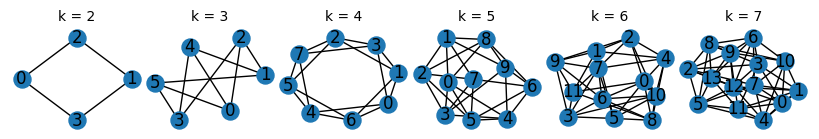

In [27]:
fig, axis = plt.subplots(nrows=1, ncols=6, figsize=(8, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i, degree in enumerate(range(2, 8)):
    axis[i].set_title((f'k = {degree}'), fontdict={'fontsize': 10})
    K = nx.random_regular_graph(degree, n=degree * 2)
    ax = nx.draw(K, pos=nx.kamada_kawai_layout(K), node_size=150, with_labels=True, ax=axis[i])

## Defintion 21 - Average degree

$d(G)=\frac{1}{|V|}\sum_{v\in V}d(v)$ and $\delta(G)\le d(G)\le \Delta(G).$ 

In [28]:
degrees = [G.degree(n) for n in G.nodes()]
average_degree = round(np.average(degrees), 2)
print(f'Average degree: {average_degree}')

Average degree: 2.33


## Definition 22 - Number of Edges

$|E| =\frac {1}{2}\sum_{v\in V}d(v)=\frac{1}{2}d(G)*|V|$

In [29]:
degrees = [G.degree(n) for n in G.nodes()]
right = 0.5 * np.average(degrees) * G.number_of_nodes()
left = .5 * sum(degrees)

assert left == right

print(f'Number of edges: {left}')

Number of edges: 7.0


## Definition 23 - Path

A path is non-empty graph $P=(V, E)$ of the form $V=\{x_0, x_1, ..., x_k\}$ and $E = \{x_0 x_1, ..., x_{k-1} x_k\}$ where the $x_i$ are all distinct.

*Note: Edges cannot be repeated. Vertex cannot be repeated*

V(P) = {0, 1, 2, 3, 4}
E(P) = {(0, 1), (3, 4), (2, 3), (1, 2)}


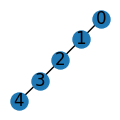

In [30]:
P = nx.path_graph(5)

fig = plt.figure(figsize=figsize)
nx.draw(P, pos=nx.kamada_kawai_layout(P), node_size=150, with_labels=True)

print(f'V(P) = {set(P.nodes)}')
print(f'E(P) = {set(P.edges)}')

## Definition 24 - H-path (Hamiltonian path)

Given a graph $H$, we call $P$ an $H$-path if $P$ is non-trivial and meets $H$ exactly in its end points.

*Hamiltonian path: visits every vertex in the graph (exactly once, because it is a path)*

V(H) = {1, 2, 3, 4, 5, 6}
E(H) = {(3, 1), (1, 6), (4, 3), (2, 4), (6, 5)}


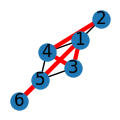

In [31]:
path = nx.algorithms.tournament.hamiltonian_path(G.to_directed())

H = nx.Graph()
nx.add_path(H, path)

assert G.nodes == H.nodes
print(f'V(H) = {set(H.nodes)}')
print(f'E(H) = {set(H.edges)}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(H, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Definition 25 - Cycle

If $P = x_0,...,x_1$ is a path and $k\ge$ 3 the the graph $C = P + x_{k-1} x_0$ is called a cycle.

*A cycle in a graph is a non-empty trail in which only the first and last vertices are equal.*

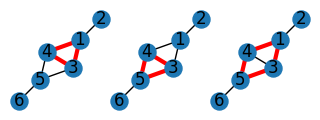

In [32]:
cycles = nx.cycle_basis(G)  # get minimal collection of cycles
cycles.append([1, 4, 5, 3]) # add not minimal cycle

fig, axis = plt.subplots(nrows=1, ncols=len(cycles), figsize=(len(cycles), 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i, cycle in enumerate(cycles):
    H = nx.Graph()
    nx.add_cycle(H, cycle)  
    
    nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[i])
    nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3, ax=axis[i])

### Examples

*Note: The cycle $C_3$ is also called a triangle. The cycle $C_4$ is regular graph ans also denoated by $Q_2$ (2-cube).*

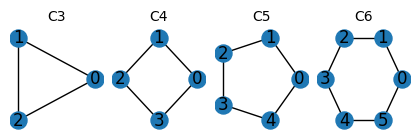

In [33]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(4, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)

for i in range(3, 7):
    H = nx.cycle_graph(i)
    axis[i-3].set_title((f'C{i}'), fontdict={'fontsize': 10})
    
    nx.draw(H, pos=nx.circular_layout(H), node_size=150, with_labels=True, ax=axis[i-3])

## Definition 26 - Girth

The minimum length of a cycle in a graph $G$ is the girth $g(G)$.

In [34]:
cycles = nx.cycle_basis(G)
girth = min(map(len, cycles))
print(f'g(G) = {girth}')

g(G) = 3


## Definition 27 - Circumference

The maximum length of a cycle in $G$ is its circumference.

Maximum length of cycle: 4


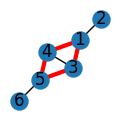

In [35]:
cycles = nx.cycle_basis(G)
nodes = np.unique(np.array(cycles).flatten())

H = nx.Graph()
nx.add_cycle(H, [1, 4, 5, 3])  
print(f'Maximum length of cycle: {len(nodes)}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Definition 28 - Chord

An edge which joins two vertices of a cycle but is not itself an edge of the cycle is chord of the cycle.

Cord (marked blue) of the cycle {1, 3, 5, 4} is (3, 4)


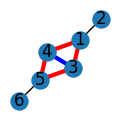

In [36]:
H = nx.Graph()
nx.add_cycle(H, [1, 4, 5, 3])  

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);
nx.draw_networkx_edges(G, pos=pos, edgelist=[(3, 4)], edge_color='blue', width=3);

print('Cord (marked blue) of the cycle {1, 3, 5, 4} is (3, 4)') 

## Defintiton 29 - Induced cycle

An inducted cycle in $G$, a cycle in $G$ forming an induced subgraph is one that has no chords.

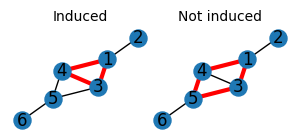

In [37]:
cycles = nx.cycle_basis(G)

H = nx.Graph()
nx.add_cycle(H, cycles[0])  

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1, wspace=0, hspace=0)

axis[0].set_title((f'Induced'), fontdict={'fontsize': 10})
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0])
nx.draw_networkx_edges(H, pos=pos, edgelist=H.edges, edge_color='red', width=3, ax=axis[0])

H = nx.Graph()
nx.add_cycle(H, [1, 3, 5, 4])  

axis[1].set_title((f'Not induced'), fontdict={'fontsize': 10})
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[1])
nx.draw_networkx_edges(H, pos=pos, edgelist=H.edges, edge_color='red', width=3, ax=axis[1]);

## Defintion 30 - Distance

The distance $d_G(x, y)$ in $G$ of two vertices $x,y$ is the length of a shortest $x-y$ path in $G$.

Distance = 3


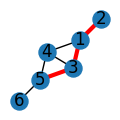

In [38]:
node_a = 2
node_b = 5
path = nx.shortest_path(G, node_a, node_b)
length = nx.shortest_path_length(G, node_a, node_b)

print(f'Distance = {length}')

H = nx.Graph()
nx.add_path(H, path)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Defintion 31 - Diameter

The greatest distance between any two vertices in $G$  is the diameter of $G$, denoted by diam $G$.

Diameter = 4


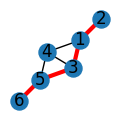

In [39]:
diameter = nx.diameter(G) 
print(f'Diameter = {diameter}')

# The biggest distances is between vertices 2 an 6.
H = nx.Graph()
nx.add_path(H, [2, 1, 3, 5, 6])

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Defintion 32 - Central

A vertex is central in $G$ if its greatest distance from any other vertex is as small as possible.

Central nodes = {3, 4}


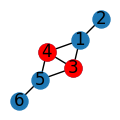

In [40]:
center_nodes = nx.center(G)
print(f'Central nodes = {set(center_nodes)}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=center_nodes, node_color='red', node_size=150);

## Defintion 33 - Radius

The greatest distance between the central vertex and from any other vertex denoted $radG$ where $radG=min_{x\in V(G)}max_{y\in V(G)}d_G(x, y)$ where $radG\ge diamG\ge 2radG$

Radius = 2


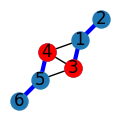

In [41]:
center_nodes = nx.center(G)

radius = nx.radius(G)
print(f'Radius = {radius}')

# The greatest distance between the cenral vertices {3, 4} is 2 (marked green).
H = nx.Graph()
nx.add_path(H, [2, 1, 3])
nx.add_path(H, [4, 5, 6])

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=center_nodes, node_color='red', node_size=150)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='blue', width=3);

## Definition 34 - Walk

A walk of length $k$ is a non-empty alternating sequence of vertices and edges in $G$.

*Note: Edges can be repeated. Vertex can be repeated.*

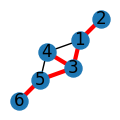

In [42]:
H = nx.Graph()
nx.add_path(H, [2, 1, 3, 4, 3, 5, 6])

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

### Trial

Trail is an open walk in which no edge is repeated. 

*Note: Only vertex can be repeated.*

## Definition 35 - Connected

A non-empty graph is $G$ is called connected if any two of its vertices are linked by a path in G.

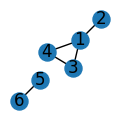

In [43]:
assert nx.is_connected(G) == True

H = G.copy()
H.remove_edges_from([(4, 5), (3, 5)])

# There is no path between vertices, for example 2 and 6. 
assert nx.is_connected(H) == False
# assert nx.shortest_path(H, 2, 6)  # It will raise an exception: NetworkXNoPath: No path between 2 and 5.

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=pos, node_size=150, with_labels=True)

## Definition 36 - Component

A maximal connected subgraph of $G$ is called a component.

Components = [{1, 2, 3, 4}, {5, 6}]


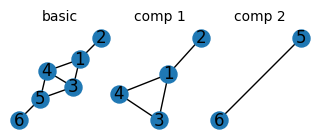

In [44]:
H = G.copy()
H.remove_edges_from([(4, 5), (3, 5)])

components = list(nx.components.connected_components(H))
print(f'Components = {components}')

fig, axis = plt.subplots(nrows=1, ncols=len(components)+1, figsize=(3, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0])
axis[0].set_title((f'basic'), fontdict={'fontsize': 10})

for i in range(len(components)):
    component = components[i]
    H = nx.subgraph(G, component)  
    nx.draw(H, pos=pos, node_size=150, with_labels=True, ax=axis[i+1])
    axis[i+1].set_title((f'comp {i+1}'), fontdict={'fontsize': 10})
    
    # nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3, ax=axis[i])

## Definition 37 - Separator

If $A,B\subset V$ and $X\subseteq V\cup E$ are such that every $A - B$ path in $G$ contains a vertex or an edge from $X$ we say that $X$ separates the set $A$ and $B$ in $G$.

*Note: The separator is a set of vertices that divides a graph into two or more components* 

Separators = {1, 5}


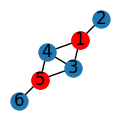

In [45]:
separators = list(nx.all_node_cuts(G))
separators = np.array(list(map(list, separators))).flatten()
print(f'Separators = {set(separators)}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True);
nx.draw_networkx_nodes(G, pos=pos, nodelist=separators, node_color='red', node_size=150);

## Definition 38 - Cutvertex

A vertex which separates two other vertices of the same component is a cutvertex.

*Note: A cutvertex is a special case of a sepatator.*

In [46]:
cutvertices = list(nx.articulation_points(G))

print(f'Cutvertices = {cutvertices}')

Cutvertices = [5, 1]


## Definition 39 - Bridge

An edge separating its ends is a bridge.

Bridges = [(1, 2), (5, 6)]


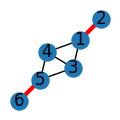

In [47]:
bridges = list(nx.bridges(G))
print(f'Bridges = {bridges}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True);
nx.draw_networkx_edges(G, pos=pos, edgelist=bridges, edge_color='red', width=3);

## Definition 40 - k-connected

$G$ is called k-connected if $|G| > k$ and $G - X$ is connected for every set $X\subseteq V$ with $|X|<k$. No vertices of $G$ are separated by fewer than $k$ other vertices.

G is 1-connected.
Cuts: [{1}, {5}]


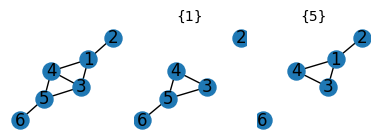

In [48]:
# Find k for H graph
cuts = list(nx.all_node_cuts(G))
k = max(list(map(len, cuts)))
print(f'G is {k}-connected.')
print(f'Cuts: {cuts}')

fig, axis = plt.subplots(nrows=1, ncols=len(cuts)+1, figsize=(len(cuts)+1, 1), sharey=True)
plt.subplots_adjust(left=0, bottom=-0.1, right=1.2, top=0.9, wspace=0.1, hspace=0)
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0]);

for i, cut in enumerate(cuts):
    I = G.copy()
    I.remove_nodes_from(cut)
    
    assert nx.is_connected(I) == False
    
    axis[i+1].set_title((f'{cut}'), fontdict={'fontsize': 10})
    nx.draw(I, pos=pos, node_size=150, with_labels=True, ax=axis[i+1])

### Example

*Note: In example $H$ is regular graph and it is cycle $C_{6}^{2}$ (squared $C_6$).*

H is 4-connected.
Cuts: [{0, 2, 4, 5}, {0, 1, 3, 4}]


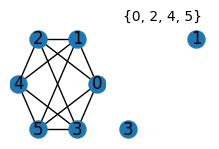

In [49]:
H = nx.random_regular_graph(d=4, n=6, seed=44) 

cuts = list(nx.all_node_cuts(H))
k = max(list(map(len, cuts)))
print(f'H is {k}-connected.')
print(f'Cuts: {cuts}')

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), sharey=True)
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.1, hspace=0)
nx.draw(H, pos=nx.circular_layout(H), node_size=150, with_labels=True, ax=axis[0])

I = H.copy()
I.remove_nodes_from(cuts[0])
axis[1].set_title((f'{cuts[0]}'), fontdict={'fontsize': 10})
nx.draw(I, pos=nx.circular_layout(H), node_size=150, with_labels=True, ax=axis[1])
plt.margins(0.2);

## Definition 41 - Connectivity 

The greatest integer $k$ such that $G$ is $k$-connected is the connectivity $\kappa (G)$.

In [50]:
connectivity = nx.connectivity.connectivity.node_connectivity(G)
print(f'𝜅(𝐺)={connectivity}')

𝜅(𝐺)=1


## Definition 42 - k-edge-connected 

If $|G|>1$ and $G-F$ is connected for every set $F\subseteq E$ of fewer than $k$ edges then $G$ is called $k$-edge connected. 

*Note: If $G$ is $k$-edge connected and we remove $k-1$ specific edges, the graph $G$ will be disconnected.* 

Edge cuts of G: {(2, 1)}
Components of H: [{1, 3, 4, 5, 6}, {2}]


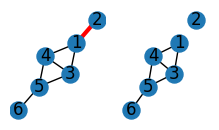

In [51]:
edge_cuts = nx.minimum_edge_cut(G)
print(f'Edge cuts of G: {edge_cuts}')

H = G.copy()
H.remove_edges_from(edge_cuts)

print(f'Components of H: {list(nx.components.connected_components(H))}')

assert nx.is_connected(H) == False

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), sharey=True)
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.1, hspace=0)

nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0]);
nx.draw_networkx_edges(G, pos=pos, edgelist=edge_cuts, edge_color='red', width=3, ax=axis[0]);

nx.draw(H, pos=pos, node_size=150, with_labels=True, ax=axis[1])
plt.margins(0.2);

### Example

Edge cuts from G: {(6, 4), (5, 4), (11, 4), (10, 4), (3, 4)}
Components of I: [{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11}, {4}]


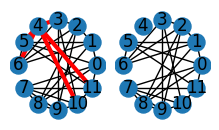

In [52]:
H =  nx.icosahedral_graph()
edge_cuts = nx.minimum_edge_cut(H)
print(f'Edge cuts from G: {edge_cuts}')

I = H.copy()
I.remove_edges_from(edge_cuts)
print(f'Components of I: {list(nx.components.connected_components(I))}')


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), sharey=True)
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.1, hspace=0)

nx.draw(H, pos=nx.circular_layout(H), node_size=150, with_labels=True, ax=axis[0]);
nx.draw_networkx_edges(H, pos=nx.circular_layout(H), edgelist=edge_cuts, edge_color='red', width=3, ax=axis[0]);

nx.draw(I, pos=nx.circular_layout(I), node_size=150, with_labels=True, ax=axis[1])

## Definition 43 - Edge-connectivity



*Note: The number of nodes needed to disconnect the graph.

Edge connectivity of G = 1
G will be disconnected after removing an edge from [(1, 2), (5, 6)].


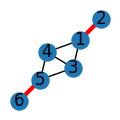

In [53]:
edge_connectivity = nx.edge_connectivity(G)
print(f'Edge connectivity of G = {edge_connectivity}')

edges = [(1, 2), (5, 6)]
print(f'G will be disconnected after removing an edge from {edges}.')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3);

In [54]:
H =  nx.icosahedral_graph()
edge_connectivity = nx.edge_connectivity(H)
print(f'Edge connectivity of H = {edge_connectivity}')  # We need to remove 5 edges as shown in the example above.

Edge connectivity of H = 5


## Definition 44 - Forest

A forest is an acyclic, undirected graph,

*Note: A forest is a collection of some component called tree. In other words a forest is a collection of trees.*

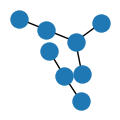

In [55]:
T_1 = nx.random_tree(5, seed=42)
T_2 = nx.random_tree(3, seed=56)

F = nx.disjoint_union(T_1, T_2)

assert nx.is_connected(F) == False
assert len(nx.cycle_basis(F)) == 0

fig = plt.figure(figsize=(1,1))
nx.draw(F, pos=nx.kamada_kawai_layout(F), node_size=150, with_labels=False);

## Definition 45 - Tree

A connected forest is called a tree. $G$ is called tree if there is exactly only one path between every two vertices.

*Note: A graph is a tree if and only if the graph is connected and does not contain any cycle.*

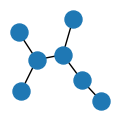

In [56]:
H = nx.random_tree(7, seed=42, create_using=nx.Graph)

assert nx.is_connected(H) == True
assert len(nx.cycle_basis(H)) == 0

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=False);

## Definition 46 - Leaf

The vertices of degree is 1 of a tree.

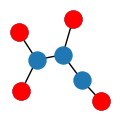

In [57]:
H = nx.random_tree(7, seed=42, create_using=nx.Graph)
degrees = nx.degree(H)
leaves = list(map(lambda x: x[0], filter(lambda x: x[1]==1, degrees)))

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=False);
nx.draw_networkx_nodes(H, pos=nx.kamada_kawai_layout(H), nodelist=leaves, node_size=150, node_color='red');

## Definition 47 - Tree-order

Writing $x\ge y$ for $x\in rTy$ then define a partial ordering on $V(T)$, tree-order associated with $T$ and $r$. 

*Notation: $xTy$ denotes the unique $x-y$ path in $T$.*

The tree-order is the partial ordering on the vertices of a tree with $u < v$ if and only if the unique path from the root to $v$ passes through $u$.

*Note: a partial order on a set is an arrangement such that, for certain pairs of elements, one precedes the other.*

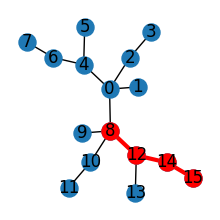

In [58]:
H = nx.binomial_tree(4)
degrees = nx.degree(H)
leaves = list(map(lambda x: x[0], filter(lambda x: x[1]==1, degrees)))

# Take all paths from the root to a leaf node. Check if leaf node's id is higher from his predecessor.
for leaf in leaves:
    path = nx.shortest_path(H, 0, leaf)
    is_monotonic = np.all(np.diff(path) > 0)
    assert is_monotonic == True 

fig = plt.figure(figsize=(2, 2))
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True);
nx.draw_networkx_edges(H, pos=nx.kamada_kawai_layout(H), edgelist=[(8, 12), (12, 14), (14, 15)], edge_color='red', width=3);
nx.draw_networkx_nodes(H, pos=nx.kamada_kawai_layout(H), nodelist=[8, 12, 14, 15], node_size=150, node_color='red');

## Definition 48 - Normal Tree

A rooted tree $T$ which is a subgraph of some graph $G$ is a normal tree if the ends of every $T$-path in $G$ are comparable in this tree-order.

*Note: A normal tree has only one root.*

## Definition 49 - R-partitie

A graph $G=(V,E)$ is called $r$-partite if $V$ admits a partition into $r$ classes such that every edges has its ends in different classes. 

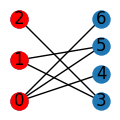

In [59]:
H = nx.bipartite.random_graph(3, 4, p=0.5, seed=42)
top = nx.bipartite.sets(H)[0]

fig = plt.figure(figsize=figsize)
new_pos = nx.bipartite_layout(H, top)
nx.draw(H, pos=new_pos, node_size=150, with_labels=True);
nx.draw_networkx_nodes(H, pos=new_pos, nodelist=top, node_size=150, node_color='red');

## Definition 50 - Complete Partite 

An $r$-partitie in which every wtow vertices from different partitions classes are adjacent is called complete.

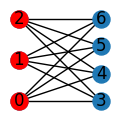

In [60]:
H = nx.bipartite.complete_bipartite_graph(3, 4)
top = nx.bipartite.sets(H)[0]

fig = plt.figure(figsize=figsize)
new_pos = nx.bipartite_layout(H, top)
nx.draw(H, pos=new_pos, node_size=150, with_labels=True);
nx.draw_networkx_nodes(H, pos=new_pos, nodelist=top, node_size=150, node_color='red');

## Definition 51 - Contraction

Let $e=xy$ be an edge of the graph $G$. By $G/e$ we denote the graph obtained from $G$ by contracting edge $e$ into a new vertex $v_E$

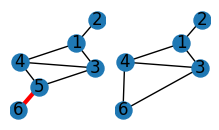

In [16]:
H = nx.minors.contracted_edge(G, (6, 5), self_loops=False)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), sharey=True)
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.1, hspace=0)

nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0]);
nx.draw(H, pos=pos, node_size=150, with_labels=True, ax=axis[1]);
nx.draw_networkx_edges(G, pos=pos, edgelist=[(5, 6)], edge_color='red', width=3, ax=axis[0]);

## Definition 52 - Minor

If $G=MX$ is a subgraph of another graph $Y$ we call $X$ a minor of $Y$.

*Note: H is called a minor of the graph G if H can be formed from G by deleting edges.*

## Definition 53 - Eulerian

A closed walk in a graph is an Euler tour if it traverses every edge of the graph exactly once. Its called if it admits an Euler tour.

Eulerian path = [(0, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 4), (4, 2), (2, 3), (3, 4), (4, 0)]


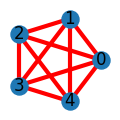

In [19]:
assert nx.is_eulerian(G) == False

H = nx.complete_graph(5)
assert nx.is_eulerian(H) == True

eulerian_path = list(nx.eulerian_path(H))
print(f'Eulerian path = {eulerian_path}')

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=nx.circular_layout(H), node_size=150, with_labels=True);
nx.draw_networkx_edges(H, pos=nx.circular_layout(H), edgelist=eulerian_path, edge_color='red', width=3);

## Definition 54 - Vertex Space

The vertex space of $G$ is the vector space over the 2-element field of all functions $V\to F_2, \nu(G)$.

*Note: These vector spaces make it possible to use techniques of linear algebra in studying the graph.*

## Definition 55 - Edge Space

The function $E\to F_2$ form the edge space of $G$, $ \mathcal{E}(G)$.

## Definition 56 - Cycle Space

The cycle space is the subspace of the edge space spanned by all the cycles in $G$. $\mathcal{C}=\mathcal{C}(G)$.

## Definition 57 - Cut space

The cut edges of $G$ form a subspace of $\mathcal{E}(G)$ denoted by $\mathcal{C}^*(G)$. 

## Defintion 58 - Hypergraph

A hypergraph is a pair $(V, E)$ of disjoint sets, where elements of $E$ are non-empty subset (of any cardinality of $V$).

## Definition 59 - Directed

A directed graph is a pair $(V, E)$ of disjoint set (of vertices and edges) together with two maps init : $E\to V$ and ter : $E\to V$ assigning to every edge $e$ an initial vertex init($e$) and a terminal vertex ter($e$). 

*Note: a directed graph G where each edge (u, v) in E connects vertex u to vertex v, and represents a directed path from u to v.*

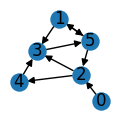

In [9]:
H = nx.erdos_renyi_graph(6, 0.2, seed=42, directed=True)

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True)

## Definition 60 - Orientation

A directed graph $D$ is an orientation of an (undirected) graph $G$ if $V(D)V(G)$ and $E(D)=E(G)$ and if $\{init(e), ter(e)\} = {x, y}$ for every edge $e=xy$.

*Note: An oriented graph is a directed graph having no symmetric pair of directed edges. A complete oriented graph is called a tournament.*

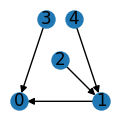

In [59]:
H = nx.gnr_graph(5, p=0.5, seed=50)

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=nx.planar_layout(H), node_size=150, with_labels=True)

### Tournament

Tournament is a complete oriented graph.

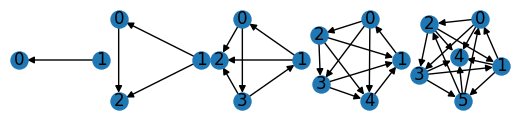

In [60]:
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(5, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i in range(2, 7):
    H = nx.tournament.random_tournament(i, seed=42)
    nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True, ax=axis[i-2])

Different edges for tournament graph.

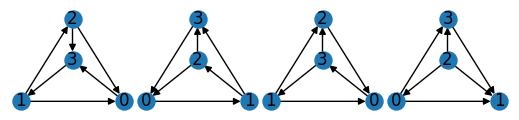

In [49]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(5, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i in range(4):
    H = nx.tournament.random_tournament(4, seed=i)
    nx.draw(H, pos=nx.planar_layout(H), node_size=150, with_labels=True, ax=axis[i])
# plt.margins(0.3);

## Definition 61 - Multigraph

A multigraph is a pair $(V, E)$ of disjoint sets (of vertices and edges) together with a map $E\to V\cup |V|^2$ assigning to every edge one or two vertices, its endpoints. 

*Note: a multigraph is a graph which is permitted to have multiple edges (also called parallel edges), that is, edges that have the same end nodes. Thus two vertices may be connected by more than one edge.*

MultiGraph with 3 nodes and 4 edges


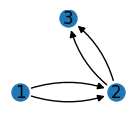

In [11]:
H = nx.MultiGraph()

# Add edges to the graph
H.add_edge(1, 2, rad=0.2, label='A')
H.add_edge(1, 2, rad=-0.2, label='B')
H.add_edge(2, 3, rad=0.2, label='A')
H.add_edge(2, 3, rad=-0.2, label='B')

print(nx.info(H))

fig = plt.figure(figsize=(1.5, 1.5))
plt.tick_params(left=False, labelleft=False) 
plt.box(False)

new_pos = nx.planar_layout(H)
nx.draw_networkx_nodes(H, new_pos, node_size=150, label=True)
nx.draw_networkx_labels(H, new_pos)

for edge in H.edges(data=True):
    nx.draw_networkx_edges(H, new_pos, edgelist=[(edge[0],edge[1])], arrows=True, connectionstyle=f'arc3, rad = {edge[2]["rad"]}')
# plt.margins(0.05);

## Definition 62 - Matching

A set $M$ of independent edges in a graph $G=(V,E)$ is called a matching.

*Note: Matching refers to a subset of the edges of a graph, such that no two edges in the subset share a common vertex.*

Matching = {(1, 2), (3, 4), (5, 6)}


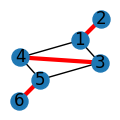

In [17]:
M = nx.maximal_matching(G)
print(f'Matching = {M}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=M, edge_color='red', width=3);

### Additional example

Matching = {(0, 1), (4, 5), (2, 3)}


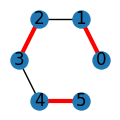

In [19]:
P = nx.path_graph(6)
M = nx.maximal_matching(P)
print(f'Matching = {M}')

fig = plt.figure(figsize=figsize)
new_pos = nx.circular_layout(P)
nx.draw(P, pos=new_pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(P, pos=new_pos, edgelist=M, edge_color='red', width=3);

## Definition 63 - Factor

A $k$-regular spanning subgraph is called $k$-factor.

*Note: A spanning k-regular subgraph of G is a subgraph that contains each vertex of G and a subset of the edges of G such that each vertex has degree k.*

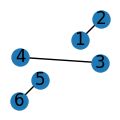

In [24]:
H = nx.k_factor(G, k=1)

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=pos, node_size=150, with_labels=True)
# nx.draw_networkx_edges(P, pos=pos, edgelist=M, edge_color='red', width=3);

## Definition 64 - Alternating Paths

## Definition 65 - Augmenting Path

## Definition 66 - Cover

## Definition 67 - $q(G)$

# IN PROGRESS